<a href="https://colab.research.google.com/github/broskunta/PyTorch-Linear-Regression/blob/main/Linear_Regression_with_Multiple_Outputs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Linear Regression with Multiple Outputs.

Preparation

In [20]:
# Import the libraries we need for this lab

from torch import nn,optim
import torch
import numpy as np
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D
from torch.utils.data import Dataset, DataLoader

In [3]:
# set randon seed
torch.manual_seed(1)

In [19]:
# The function for plotting 2D

# The function for plotting 2D

def Plot_2D_Plane(model, dataset, n=0):
    w1 = model.state_dict()['linear.weight'].numpy()[0][0]
    w2 = model.state_dict()['linear.weight'].numpy()[0][1]
    b = model.state_dict()['linear.bias'].numpy()

    # Data
    x1 = data_set.x[:, 0].view(-1, 1).numpy()
    x2 = data_set.x[:, 1].view(-1, 1).numpy()
    y = data_set.y.numpy()

    # Make plane
    X, Y = np.meshgrid(np.arange(x1.min(), x1.max(), 0.05), np.arange(x2.min(), x2.max(), 0.05))
    yhat = w1 * X + w2 * Y + b

    # Plotting
    fig = plt.figure()
    ax = fig.gca(projection='3d')

    ax.plot(x1[:, 0], x2[:, 0], y[:, 0],'ro', label='y') # Scatter plot

    ax.plot_surface(X, Y, yhat) # Plane plot

    ax.set_xlabel('x1 ')
    ax.set_ylabel('x2 ')
    ax.set_zlabel('y')
    plt.title('estimated plane iteration:' + str(n))
    ax.legend()

    plt.show()

Make some Data


In [5]:
# Create a 2D dataset

class Data2D(Dataset):

    # Constructor
    def __init__(self):
        self.x = torch.zeros(20, 2)
        self.x[:, 0] = torch.arange(-1, 1, 0.1)
        self.x[:, 1] = torch.arange(-1, 1, 0.1)
        self.w = torch.tensor([[1.0], [1.0]])
        self.b = 1
        self.f = torch.mm(self.x, self.w) + self.b
        self.y = self.f + 0.1 * torch.randn((self.x.shape[0],1))
        self.len = self.x.shape[0]

    # Getter
    def __getitem__(self, index):
        return self.x[index], self.y[index]

    # Get Length
    def __len__(self):
        return self.len

In [6]:
# create the dataset object
data_set = Data2D()

### Create the model, optimizer and total cost function

In [7]:
# Create a customized linear

class linear_regression(nn.Module):

    # Constructor
    def __init__(self, input_size, output_size):
        super(linear_regression, self).__init__()
        self.linear = nn.Linear(input_size, output_size)

    # Prediction
    def forward(self, x):
        yhat = self.linear(x)
        return yhat

In [8]:
# Create the linear regression model and print the parameters

model = linear_regression(2,1)
print("The parameters: ", list(model.parameters()))

The parameters:  [Parameter containing:
tensor([[ 0.6209, -0.1178]], requires_grad=True), Parameter containing:
tensor([0.3026], requires_grad=True)]


Create an optimizer object. Set the learning rate to 0.1. Don't forget to enter the model parameters in the constructor.

In [9]:
# create the optimizer
optimizer = optim.SGD(model.parameters(), lr = 0.1)

In [10]:
# create cost function
criterion = nn.MSELoss()

In [11]:
# create the data loader
train_loader = DataLoader(dataset=data_set, batch_size = 2)

### Train the model via Mini-Batch Gradient Descent

In [12]:
# create a list to store the loss


In [22]:
# Train the model

LOSS = []
print("Before Training: ")
#Plot_2D_Plane(model, data_set)
epochs = 100

def train_model(epochs):
    for epoch in range(epochs):
        for x,y in train_loader:
            yhat = model(x)
            loss = criterion(yhat, y)
            LOSS.append(loss.item())
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
train_model(epochs)
print("After Training: ")
#Plot_2D_Plane(model, data_set, epochs)

Before Training: 
After Training: 


Text(0, 0.5, 'Cost/total loss ')

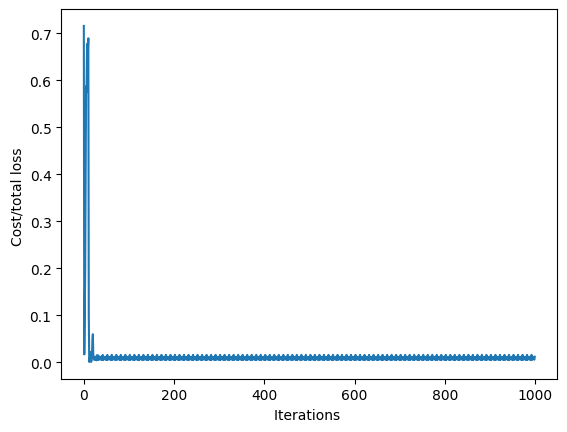

In [23]:
# Plot out the Loss and iteration diagram

plt.plot(LOSS)
plt.xlabel("Iterations ")
plt.ylabel("Cost/total loss ")

Practice

Create a new model1. Train the model with a batch size 30 and learning rate 0.1, store the loss or total cost in a list LOSS1, and plot the results.

In [47]:

data_set = Data2D()
#create data loader
train_loader = DataLoader(dataset=data_set, batch_size= 30)
#create model
model1 = linear_regression(2,1)
# create the optimizer
optimizer = optim.SGD(model1.parameters(), lr = 0.1)


In [48]:
# define the training function

# create a list to store theloss
LOSS1 = []

In [49]:
# define the function
epoch = 100

def train_model(epochs):
    #loop
    for epoch in range(epochs):
        for x,y in train_loader:
            #make prediction
            yhat = model1(x)
            # calculate the loss
            loss = criterion(yhat, y)
            LOSS1.append(loss.item())
            #zero the grads
            optimizer.zero_grad()
            #backpass
            loss.backward()
            #update parameters
            optimizer.step()

In [50]:
train_model(epochs)

Text(0, 0.5, 'Cost/total loss ')

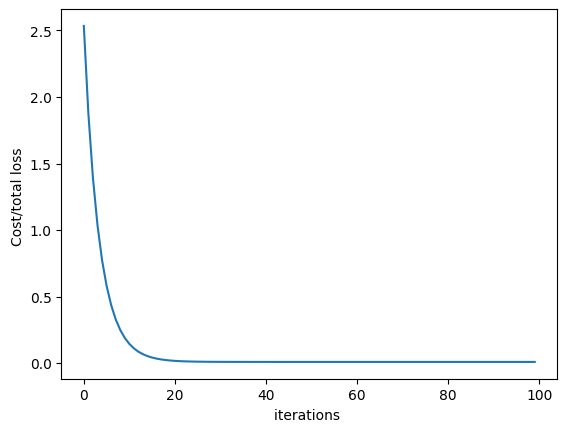

In [51]:

plt.plot(LOSS1)
plt.xlabel("iterations ")
plt.ylabel("Cost/total loss ")

Text(0, 0.5, 'Cost/total loss ')

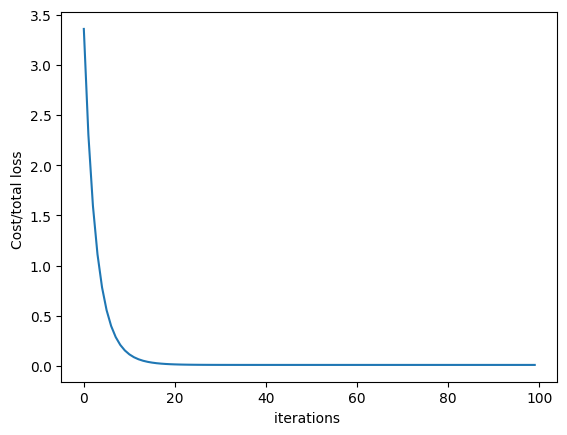

In [52]:
torch.manual_seed(2)

validation_data = Data2D()
Y = validation_data.y
X = validation_data.x



In [56]:
train_loader = DataLoader(dataset=validation_data, batch_size= 30)
#create model
model1 = linear_regression(2,1)
# create the optimizer
optimizer = optim.SGD(model1.parameters(), lr = 0.1)

In [57]:
LOSS1 = []

# define the function
epoch = 100

def train_model(epochs):
    #loop
    for epoch in range(epochs):
        for X,Y in train_loader:
            #make prediction
            yhat = model1(X)
            # calculate the loss
            loss = criterion(yhat, Y)
            LOSS1.append(loss.item())
            #zero the grads
            optimizer.zero_grad()
            #backpass
            loss.backward()
            #update parameters
            optimizer.step()

Training Complete


Text(0, 0.5, 'Cost/total loss ')

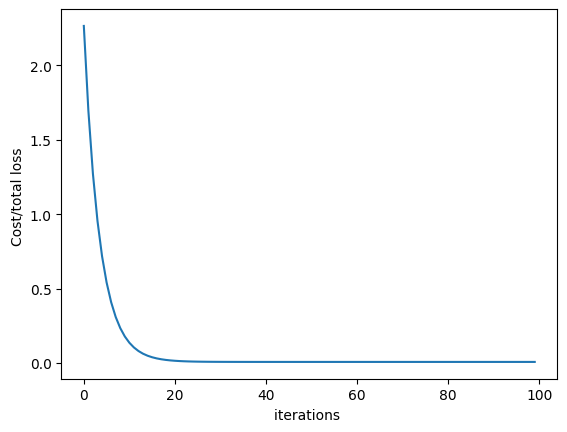

In [58]:
train_model(epochs)
print("Training Complete")
plt.plot(LOSS1)
plt.xlabel("iterations ")
plt.ylabel("Cost/total loss ")

In [59]:
print("total loss or cost for model: ",criterion(model(X),Y))
print("total loss or cost for model: ",criterion(model1(X),Y))

total loss or cost for model:  tensor(0.0108, grad_fn=<MseLossBackward0>)
total loss or cost for model:  tensor(0.0078, grad_fn=<MseLossBackward0>)


In [60]:
X=torch.tensor([[1.0,1.0,1],[1.0,2.0,1],[1.0,3.0,1],[1.0,3.0,1]])

model=nn.Linear(3,1)

yhat=model(X)

In [61]:
print(yhat)

tensor([[1.2723],
        [1.4795],
        [1.6868],
        [1.6868]], grad_fn=<AddmmBackward0>)
